# [Example Decision Tree Regression](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

a árvore de decisão é usada para ajustar uma curva senoidal com adição de observação ruidosa. Como resultado, ele aprende regressões lineares locais aproximando-se da curva senoidal.


Podemos ver que, se a profundidade máxima da árvore (controlada pelo parâmetro max_depth ) for muito alta, as árvores de decisão aprendem detalhes muito pequenos dos dados de treinamento e aprendem com o ruído, ou seja, preparam um overfit.



## Parâmetros
Quando definimos o modelo, podemos especificar os hiperparâmetros. Na prática, os mais comuns são

 - max_depth: O número máximo de níveis na árvore.
 - min_samples_leaf: O número mínimo de amostras permitido em uma folha.
 - min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno.
 - max_features : O número de atributos a se considerar ao buscarmos pela melhor divisão

In [91]:
# SUPERVISED LEARNING

# import
# load
# analyse
# (features)X AND (labels)Y
# split train and test
# choose model: classifier or regressor
# trainning model with data train
# predict
# calculate accuracy (accuracy_score)
# plot

In [105]:
# import
import numpy as np
import pylab as pl
import pandas as pd
from sklearn import tree
from sklearn import datasets

# load
data_boston = datasets.load_boston()

#convert dataset to dataframe(data, collumns)
data = pd.DataFrame(data_boston.data, columns = data_boston.feature_names)

In [106]:
# analyse

print(f"Type database:\n{type(data)}\n")
print(f"Sample datas:\n{data.head()}\n")
print(f"Type data by columns:\n{data.dtypes}\n")
print(f"Name collumns:\n{data.keys()}\n")
print(f"rows and columns:\n{np.shape(data)}")

Type database:
<class 'pandas.core.frame.DataFrame'>

Sample datas:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

Type data by columns:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

Name collumns:
Index(['CRIM', 'ZN', 'IND

### Problem: 
Predict ibi (imc)

- Analyse varibles: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [107]:
# (samples)X AND (target)Y

X = data[['DIS']]
y = data['AGE']

In [108]:
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    X, 
                                    y, 
                                    test_size=0.25)

print(f"X_train:\n{X_train.head()}\n")
print(f"y_train:\n{y_train.head()}\n")
print(f"X_test:\n{X_test.head()}\n")
print(f"y_test:\n{y_test.head()}")

X_train:
        DIS
505  2.5050
401  1.5741
415  1.8347
481  3.3317
321  4.5404

y_train:
505     80.8
401    100.0
415    100.0
481     74.9
321     54.3
Name: AGE, dtype: float64

X_test:
        DIS
30   4.2330
124  2.0063
167  2.4259
5    6.0622
15   4.4986

y_test:
30     94.1
124    95.8
167    79.2
5      58.7
15     56.5
Name: AGE, dtype: float64


In [109]:
# Model regressor
model_depth_2 = tree.DecisionTreeRegressor(max_depth = 2, random_state=0)
model_depth_5 = tree.DecisionTreeRegressor(max_depth = 5)

# train
model_depth_2 = model_depth_2.fit(X_train,y_train)
model_depth_5 = model_depth_5.fit(X_train,y_train)

# Predict
y_2 = model_depth_2.predict(X_test)
y_5 = model_depth_5.predict(X_test)

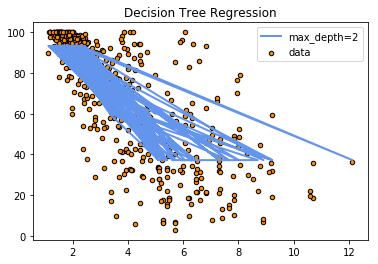

In [110]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_2, color="cornflowerblue", label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_5, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel('')
plt.ylabel('')
plt.title("Decision Tree Regression")
plt.legend()
plt.show()